<a href="https://colab.research.google.com/github/SenSiiiE/employeeTurnoverMachineLearningCode/blob/main/vikash_machineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#step -1
import the required files and package


In [3]:
import pandas as pd

In [4]:
url="https://raw.githubusercontent.com/SenSiiiE/employeeTurnoverMachineLearningCode/main/EMPLOYEE%20-%20Sheet1.csv"

In [5]:
df=pd.read_csv(url)

In [6]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#step-2
Data  cleaning<br>
Dataset used here is already clean



In [7]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [8]:
for col in df.columns:
  print(col, " : ",len(df[col].unique()),'labels')

satisfaction_level  :  92 labels
last_evaluation  :  65 labels
number_project  :  6 labels
average_montly_hours  :  215 labels
time_spend_company  :  8 labels
Work_accident  :  2 labels
left  :  2 labels
promotion_last_5years  :  2 labels
Department  :  10 labels
salary  :  3 labels



#step-3
Dealing with Text-Data<br>
Two types of categorical data<br>
Label Encoding<br>
Ordinal Encoding


In [9]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [10]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

Applying Label encoding

In [11]:
emp=pd.get_dummies(df,columns=['Department'],drop_first=True)

In [12]:
emp.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,1,0,0


Move the variable "left" to the back of the table

In [13]:
last=emp['left']
emp.drop(labels=['left'],axis=1,inplace=True)
emp.insert(0,'left',last)
emp.head(5)

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,1,0.38,0.53,2,157,3,0,0,low,0,0,0,0,0,0,1,0,0
1,1,0.80,0.86,5,262,6,0,0,medium,0,0,0,0,0,0,1,0,0
2,1,0.11,0.88,7,272,4,0,0,medium,0,0,0,0,0,0,1,0,0
3,1,0.72,0.87,5,223,5,0,0,low,0,0,0,0,0,0,1,0,0
4,1,0.37,0.52,2,159,3,0,0,low,0,0,0,0,0,0,1,0,0


Applying ordinal encoding

In [14]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [15]:
order_label={"low":1,"medium":2,"high":3}

In [16]:
emp["salary"]=emp["salary"].map(order_label)

In [17]:
emp.head(5)

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,1,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,1,0,0
1,1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,1,0,0
2,1,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,1,0,0
3,1,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,1,0,0
4,1,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,1,0,0


In [18]:
emp[emp['salary']==3].head(5)

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
72,1,0.45,0.49,2,149,3,0,0,3,0,0,0,0,0,1,0,0,0
111,1,0.09,0.85,6,289,4,0,0,3,0,0,1,0,0,0,0,0,0
189,1,0.44,0.51,2,156,3,0,0,3,0,0,0,0,0,0,0,0,1
267,1,0.45,0.53,2,129,3,0,0,3,0,0,0,0,0,0,0,0,1
306,1,0.37,0.46,2,149,3,0,0,3,0,0,0,0,1,0,0,0,0


#Heat map

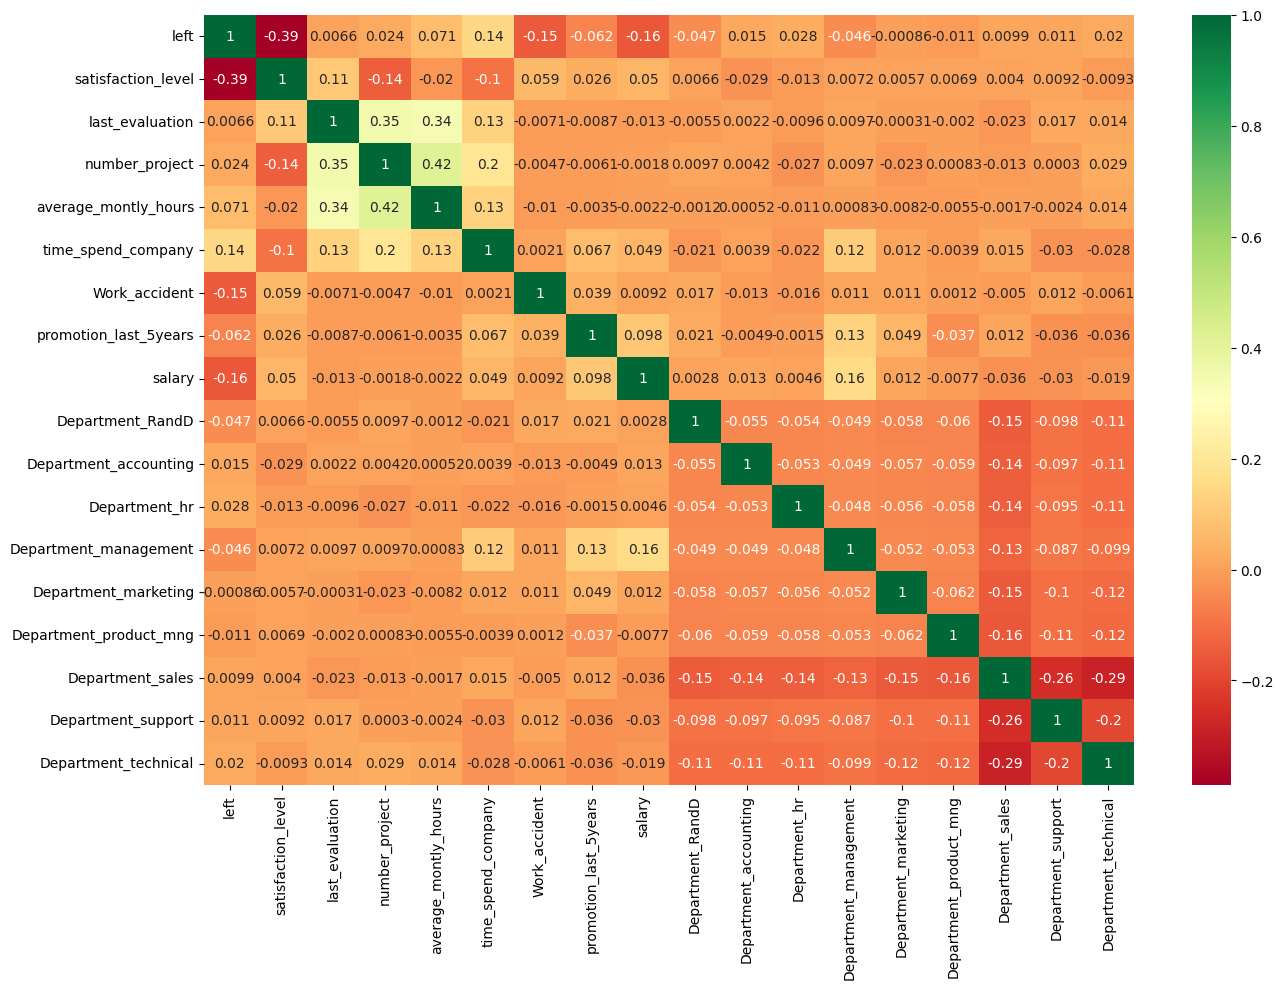

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat=emp.corr()
top=corrmat.index
plt.figure(figsize=(15,10))
g=sns.heatmap(emp[top].corr(),annot=True,cmap='RdYlGn')

#step 4
Train test split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
target_name="left"
X = emp.drop('left', axis=1)
y=emp[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [22]:
X_train[:5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
9838,1.00,0.61,3,188,4,0,0,1,0,0,0,0,0,1,0,0,0
7689,0.16,0.78,4,196,5,0,0,3,0,0,0,0,0,0,0,0,1
6557,0.80,0.80,3,175,2,0,0,2,1,0,0,0,0,0,0,0,0
6872,0.66,0.86,4,112,6,0,0,2,0,1,0,0,0,0,0,0,0
820,0.11,0.93,7,284,4,0,0,1,0,0,0,0,0,0,0,0,1


In [23]:
y_train[:5]

9838    0
7689    0
6557    0
6872    0
820     1
Name: left, dtype: int64

#step 5
<h3>Model building

<h3>Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import roc_auc_score


In [25]:
skk=StratifiedKFold(shuffle=True,n_splits=10)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

confusion matrix

In [26]:
pre=logreg.predict(X_test)

In [27]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix.
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.

    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Actual or Truth')
    plt.xlabel('Prediction')

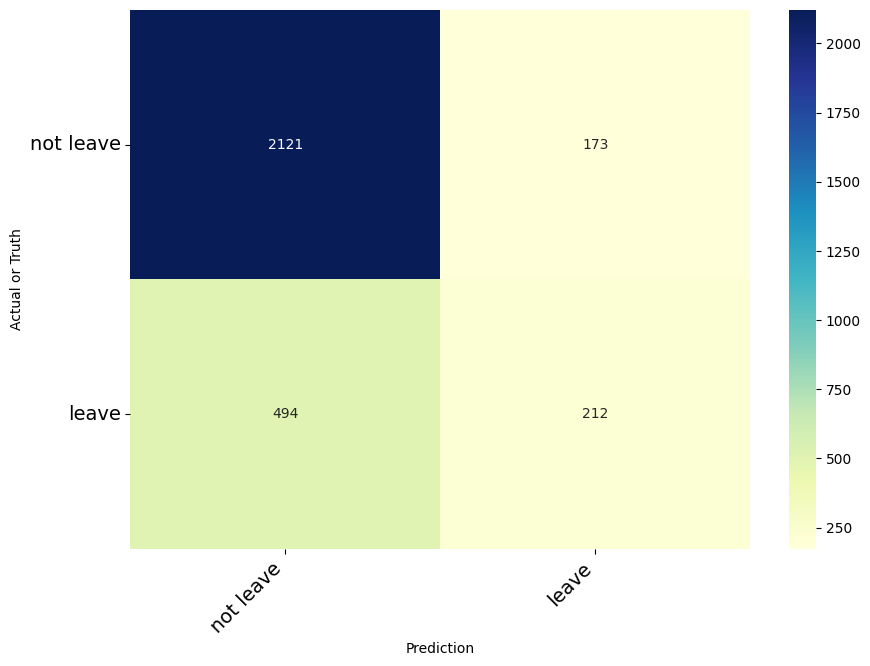

In [28]:
cm = confusion_matrix(y_test,pre)
print_confusion_matrix(cm,["not leave","leave"])

In [29]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      2294
           1       0.55      0.30      0.39       706

    accuracy                           0.78      3000
   macro avg       0.68      0.61      0.63      3000
weighted avg       0.75      0.78      0.75      3000



In [30]:
print ("Logistic ModeL")
logit_roc_auc = roc_auc_score(y_test,logreg.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)

Logistic ModeL
Logistic AUC = 0.61


<H3>DECISION TREE

In [31]:
treemodel = tree.DecisionTreeClassifier()
skk=StratifiedKFold(shuffle=True,n_splits=10)
treemodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
score3=cross_val_score(treemodel,X_train,y_train,cv=skk,scoring='accuracy') # Training score
print(score3.mean())

0.977248262440923


In [33]:
score2=cross_val_score(treemodel,X_test,y_test,cv=skk,scoring='accuracy') # Testing score
print(score2.mean())

0.9616666666666666


In [34]:
pretree=treemodel.predict(X_test)

In [35]:
print(classification_report(y_test,pretree))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2294
           1       0.94      0.96      0.95       706

    accuracy                           0.98      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



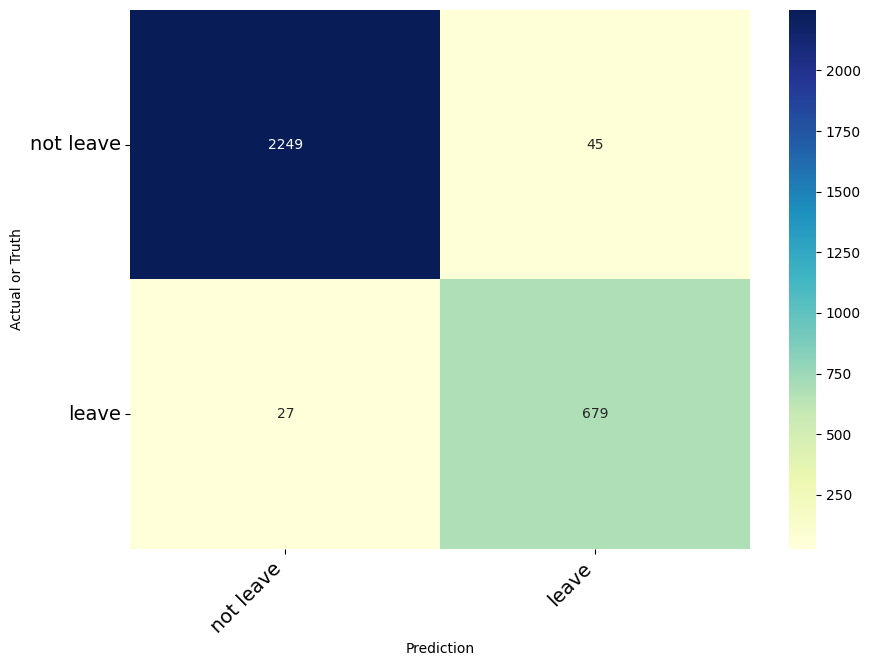

In [36]:
cm = confusion_matrix(y_test,pretree)
print_confusion_matrix(cm,["not leave","leave"])

In [37]:
print ("Decision Tree Model")
dt_roc_auc = roc_auc_score(y_test,treemodel.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)


Decision Tree Model
Decision Tree AUC = 0.97


<h3>Random Forest

In [38]:
rtreemodel = RandomForestClassifier()
rtreemodel.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
rpretree=rtreemodel.predict(X_test)

In [40]:
score7=cross_val_score(rtreemodel,X_train,y_train,cv=skk,scoring='accuracy') # Training score
print(score7.mean())

0.9914159021406729


In [41]:
score8=cross_val_score(rtreemodel,X_test,y_test,cv=skk,scoring='accuracy') # Testing score
print(score8.mean())

0.9790000000000001


In [42]:
print(classification_report(y_test,rpretree))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.98       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



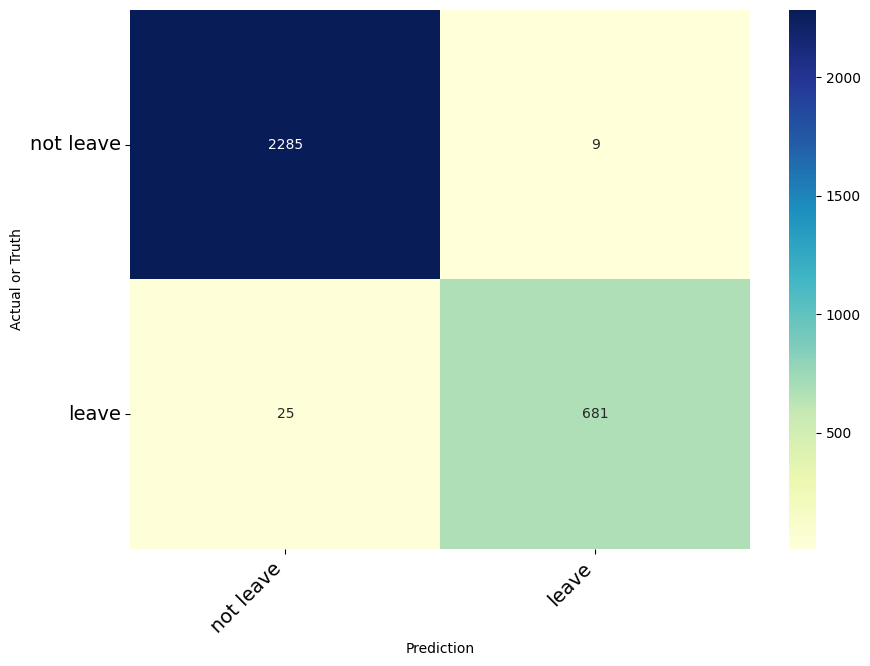

In [43]:
cm = confusion_matrix(y_test,rpretree)
print_confusion_matrix(cm,["not leave","leave"])

In [44]:
print ("Random Forest Model")
rf_roc_auc = roc_auc_score(y_test, rtreemodel.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)

Random Forest Model
Random Forest AUC = 0.98


support vector machine

In [45]:
svc = svm.SVC()
svc.fit(X_train, y_train)

SVC()

In [46]:
svcpre=svc.predict(X_test)

In [47]:
score11=cross_val_score(svc,X_train,y_train,cv=skk,scoring='accuracy') # Training score
print(score11.mean())

0.7830647067000277


In [48]:
score12=cross_val_score(svc,X_test,y_test,cv=skk,scoring='accuracy') # Testing score
print(score12.mean())

0.7646666666666667


In [49]:
print(classification_report(y_test,svcpre))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2294
           1       0.98      0.08      0.16       706

    accuracy                           0.78      3000
   macro avg       0.88      0.54      0.52      3000
weighted avg       0.83      0.78      0.71      3000



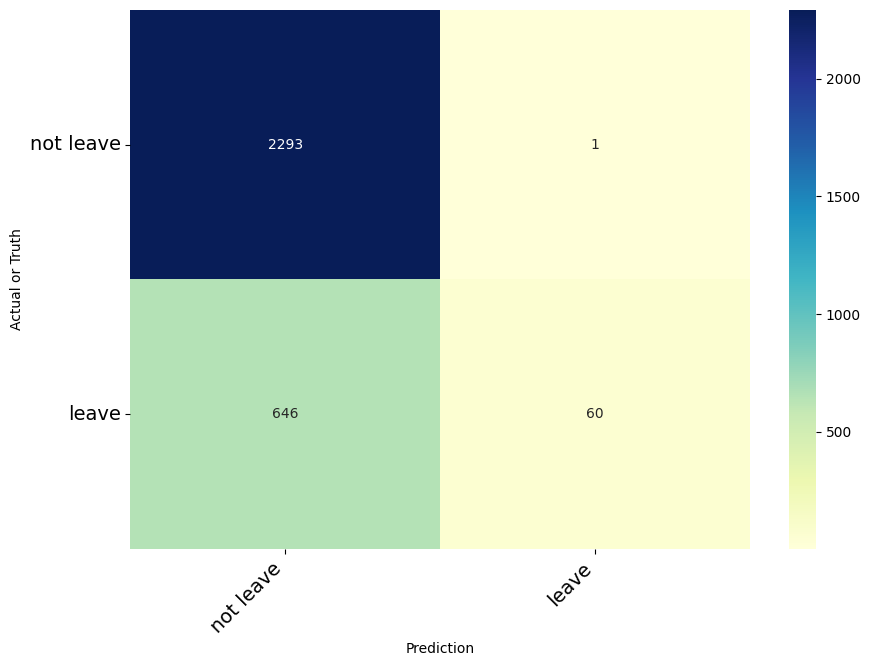

In [50]:
cm = confusion_matrix(y_test,svcpre)
print_confusion_matrix(cm,["not leave","leave"])

In [51]:
print ("Support Vector Machine")
svm_roc_auc = roc_auc_score(y_test, svc.predict(X_test))
print ("SVM AUC = %2.2f" % svm_roc_auc)

Support Vector Machine
SVM AUC = 0.54


AUC GRAPH

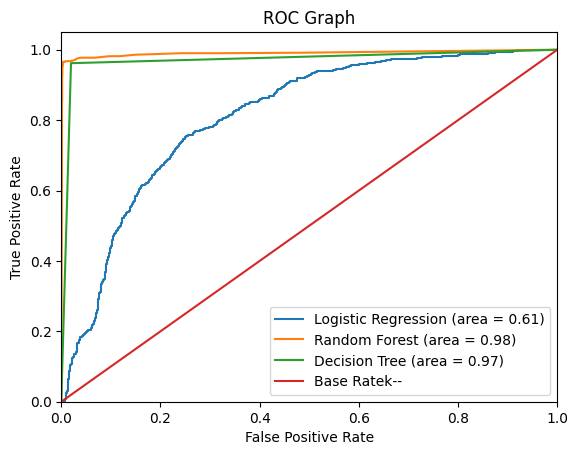

In [52]:
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test,rtreemodel.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, treemodel.predict_proba(X_test)[:,1])



plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot Support Vector Tree Tree ROC
plt.plot(label='Support vector machine (area = %0.2f)' % svm_roc_auc)


# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

SAVING THE  BEST MODEL

In [53]:
import pickle

In [54]:
with open('vikash_model_pickle','wb') as file:   # save model
    pickle.dump(rtreemodel,file)

In [55]:
with open('vikash_model_pickle','rb') as file:       # Run model
    vikash_model= pickle.load(file)